In [1]:
!pip install tensorflow

In [2]:
!pip install keras

In [43]:
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [44]:
forest=pd.read_csv("C:\\Users\\lenovo\\Downloads\\forestfires (2).csv")

In [45]:
forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


# EDA

In [46]:
#checking null values
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

No null values are here

<AxesSubplot:xlabel='FFMC', ylabel='Density'>

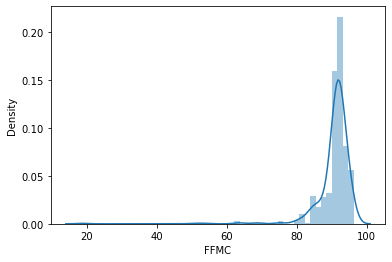

In [47]:
sns.distplot(forest['FFMC'])

<AxesSubplot:xlabel='DMC', ylabel='Density'>

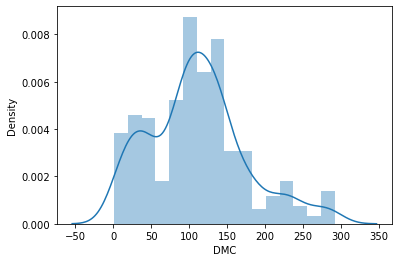

In [48]:
sns.distplot(forest['DMC'])

<AxesSubplot:xlabel='DC', ylabel='Density'>

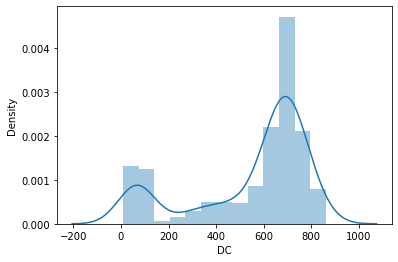

In [49]:
sns.distplot(forest['DC'])

<AxesSubplot:xlabel='ISI', ylabel='Density'>

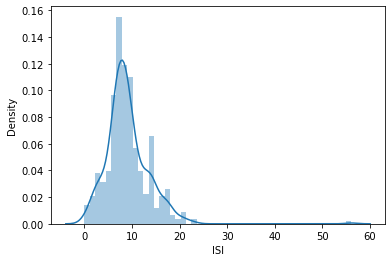

In [50]:
sns.distplot(forest['ISI'])

<AxesSubplot:xlabel='temp', ylabel='Density'>

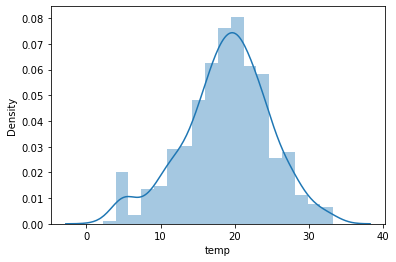

In [51]:
sns.distplot(forest['temp'])

<AxesSubplot:xlabel='RH', ylabel='Density'>

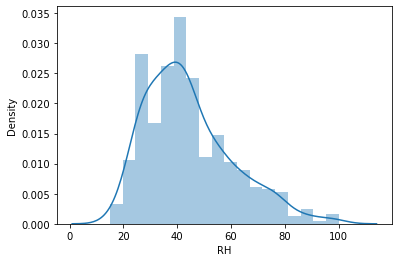

In [52]:
sns.distplot(forest['RH'])

<AxesSubplot:xlabel='wind', ylabel='Density'>

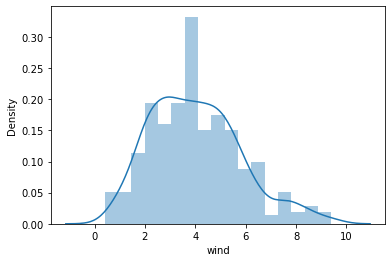

In [53]:
sns.distplot(forest['wind'])

# Label encoding the size category colum

In [54]:
forest.loc[forest.size_category=='small','size_category']=0
forest.loc[forest.size_category=='large','size_category']=1

In [55]:
forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,0
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,0
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,0
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,0
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,1
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,1
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,1
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0


# Drop the unwantedd column's

In [56]:
forest.drop(['month','day'],axis=1,inplace=True)

In [57]:
forest

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,1
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,1
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,1
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


# splitnig the independant & dependent variable

In [58]:
x=forest.iloc[:,:-1]
y=forest.iloc[:,-1]

In [59]:
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
y

0      0
1      0
2      0
3      0
4      0
      ..
512    1
513    1
514    1
515    0
516    0
Name: size_category, Length: 517, dtype: object

In [61]:
y=y.astype('float')

# using standard scaler

In [62]:
ss=preprocessing.StandardScaler()
x=ss.fit_transform(x)

# Build Model

In [63]:
model=Sequential()
model.add(Dense(28,activation='relu'))
model.add(Dense(14,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [64]:
#compikle model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [65]:
#fit the model
history=model.fit(x,y,validation_split=0.03,epochs=250,batch_size=50)

Epoch 1/250
11/11 [==============================] - 3s 73ms/step - loss: 0.8026 - accuracy: 0.4232 - val_loss: 0.7490 - val_accuracy: 0.3125
Epoch 2/250
11/11 [==============================] - 0s 15ms/step - loss: 0.7019 - accuracy: 0.5469 - val_loss: 0.6791 - val_accuracy: 0.5000
Epoch 3/250
11/11 [==============================] - 0s 17ms/step - loss: 0.6448 - accuracy: 0.6527 - val_loss: 0.6433 - val_accuracy: 0.6250
Epoch 4/250
11/11 [==============================] - 0s 16ms/step - loss: 0.6118 - accuracy: 0.7206 - val_loss: 0.6226 - val_accuracy: 0.6875
Epoch 5/250
11/11 [==============================] - 0s 17ms/step - loss: 0.5878 - accuracy: 0.7445 - val_loss: 0.6152 - val_accuracy: 0.6875
Epoch 6/250
11/11 [==============================] - 0s 26ms/step - loss: 0.5712 - accuracy: 0.7465 - val_loss: 0.6105 - val_accuracy: 0.6875
Epoch 7/250
11/11 [==============================] - 0s 16ms/step - loss: 0.5570 - accuracy: 0.7545 - val_loss: 0.6079 - val_accuracy: 0.6875
Epoch 

11/11 [==============================] - 0s 15ms/step - loss: 0.3215 - accuracy: 0.8623 - val_loss: 0.5006 - val_accuracy: 0.8125
Epoch 59/250
11/11 [==============================] - 0s 17ms/step - loss: 0.3184 - accuracy: 0.8603 - val_loss: 0.5099 - val_accuracy: 0.8125
Epoch 60/250
11/11 [==============================] - 0s 10ms/step - loss: 0.3153 - accuracy: 0.8603 - val_loss: 0.5115 - val_accuracy: 0.8125
Epoch 61/250
11/11 [==============================] - 0s 19ms/step - loss: 0.3128 - accuracy: 0.8643 - val_loss: 0.5108 - val_accuracy: 0.8750
Epoch 62/250
11/11 [==============================] - 0s 12ms/step - loss: 0.3102 - accuracy: 0.8683 - val_loss: 0.4937 - val_accuracy: 0.8750
Epoch 63/250
11/11 [==============================] - 0s 15ms/step - loss: 0.3066 - accuracy: 0.8683 - val_loss: 0.4807 - val_accuracy: 0.8750
Epoch 64/250
11/11 [==============================] - 0s 13ms/step - loss: 0.3023 - accuracy: 0.8762 - val_loss: 0.4752 - val_accuracy: 0.8750
Epoch 65/250

11/11 [==============================] - 0s 16ms/step - loss: 0.1719 - accuracy: 0.9381 - val_loss: 0.5202 - val_accuracy: 0.8750
Epoch 116/250
11/11 [==============================] - 0s 19ms/step - loss: 0.1680 - accuracy: 0.9381 - val_loss: 0.5238 - val_accuracy: 0.8750
Epoch 117/250
11/11 [==============================] - 0s 14ms/step - loss: 0.1641 - accuracy: 0.9401 - val_loss: 0.5221 - val_accuracy: 0.8750
Epoch 118/250
11/11 [==============================] - 0s 10ms/step - loss: 0.1617 - accuracy: 0.9401 - val_loss: 0.5160 - val_accuracy: 0.8750
Epoch 119/250
11/11 [==============================] - 0s 14ms/step - loss: 0.1606 - accuracy: 0.9461 - val_loss: 0.5160 - val_accuracy: 0.8750
Epoch 120/250
11/11 [==============================] - 0s 14ms/step - loss: 0.1617 - accuracy: 0.9461 - val_loss: 0.5266 - val_accuracy: 0.8750
Epoch 121/250
11/11 [==============================] - 0s 15ms/step - loss: 0.1603 - accuracy: 0.9441 - val_loss: 0.5255 - val_accuracy: 0.8750
Epoch 

Epoch 172/250
11/11 [==============================] - 0s 11ms/step - loss: 0.0786 - accuracy: 0.9840 - val_loss: 0.6501 - val_accuracy: 0.8750
Epoch 173/250
11/11 [==============================] - 0s 14ms/step - loss: 0.0764 - accuracy: 0.9860 - val_loss: 0.6409 - val_accuracy: 0.8750
Epoch 174/250
11/11 [==============================] - 0s 18ms/step - loss: 0.0761 - accuracy: 0.9840 - val_loss: 0.6437 - val_accuracy: 0.8750
Epoch 175/250
11/11 [==============================] - 0s 10ms/step - loss: 0.0750 - accuracy: 0.9820 - val_loss: 0.6449 - val_accuracy: 0.8750
Epoch 176/250
11/11 [==============================] - 0s 16ms/step - loss: 0.0732 - accuracy: 0.9860 - val_loss: 0.6428 - val_accuracy: 0.8750
Epoch 177/250
11/11 [==============================] - 0s 16ms/step - loss: 0.0718 - accuracy: 0.9880 - val_loss: 0.6498 - val_accuracy: 0.8750
Epoch 178/250
11/11 [==============================] - 0s 14ms/step - loss: 0.0707 - accuracy: 0.9880 - val_loss: 0.6557 - val_accuracy:

Epoch 229/250
11/11 [==============================] - 0s 16ms/step - loss: 0.0358 - accuracy: 0.9960 - val_loss: 0.7575 - val_accuracy: 0.8750
Epoch 230/250
11/11 [==============================] - 0s 12ms/step - loss: 0.0354 - accuracy: 0.9960 - val_loss: 0.7577 - val_accuracy: 0.8750
Epoch 231/250
11/11 [==============================] - 0s 12ms/step - loss: 0.0350 - accuracy: 0.9980 - val_loss: 0.7618 - val_accuracy: 0.8750
Epoch 232/250
11/11 [==============================] - 0s 12ms/step - loss: 0.0386 - accuracy: 0.9920 - val_loss: 0.7609 - val_accuracy: 0.8750
Epoch 233/250
11/11 [==============================] - 0s 13ms/step - loss: 0.0386 - accuracy: 0.9920 - val_loss: 0.7669 - val_accuracy: 0.8750
Epoch 234/250
11/11 [==============================] - 0s 14ms/step - loss: 0.0351 - accuracy: 0.9980 - val_loss: 0.7692 - val_accuracy: 0.8750
Epoch 235/250
11/11 [==============================] - 0s 11ms/step - loss: 0.0334 - accuracy: 1.0000 - val_loss: 0.7724 - val_accuracy:

In [66]:
scores=model.evaluate(x,y)
print(scores)

17/17 [==============================] - 0s 7ms/step - loss: 0.0515 - accuracy: 0.9923
[0.05149340257048607, 0.9922630786895752]


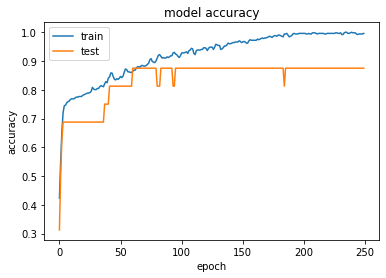

In [67]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

# Build a new model

In [68]:
model1=Sequential()
model1.add(Dense(28,activation='relu'))
model.add(Dense(14,activation='relu'))
model1.add(Dense(1,activation='sigmoid'))

In [69]:
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [70]:
history=model1.fit(x,y,validation_split=0.33,epochs=250,batch_size=50)

Epoch 1/250
7/7 [==============================] - 3s 129ms/step - loss: 0.6356 - accuracy: 0.6792 - val_loss: 0.7099 - val_accuracy: 0.6433
Epoch 2/250
7/7 [==============================] - 0s 30ms/step - loss: 0.6061 - accuracy: 0.7341 - val_loss: 0.7084 - val_accuracy: 0.6608
Epoch 3/250
7/7 [==============================] - 0s 22ms/step - loss: 0.5836 - accuracy: 0.7514 - val_loss: 0.7085 - val_accuracy: 0.6550
Epoch 4/250
7/7 [==============================] - 0s 20ms/step - loss: 0.5660 - accuracy: 0.7630 - val_loss: 0.7109 - val_accuracy: 0.6667
Epoch 5/250
7/7 [==============================] - 0s 23ms/step - loss: 0.5528 - accuracy: 0.7717 - val_loss: 0.7140 - val_accuracy: 0.6667
Epoch 6/250
7/7 [==============================] - 0s 26ms/step - loss: 0.5410 - accuracy: 0.7717 - val_loss: 0.7149 - val_accuracy: 0.6667
Epoch 7/250
7/7 [==============================] - 0s 27ms/step - loss: 0.5318 - accuracy: 0.7775 - val_loss: 0.7157 - val_accuracy: 0.6667
Epoch 8/250
7/7 [==

7/7 [==============================] - 0s 17ms/step - loss: 0.3507 - accuracy: 0.8382 - val_loss: 0.6969 - val_accuracy: 0.7310
Epoch 60/250
7/7 [==============================] - 0s 19ms/step - loss: 0.3483 - accuracy: 0.8410 - val_loss: 0.6975 - val_accuracy: 0.7310
Epoch 61/250
7/7 [==============================] - 0s 15ms/step - loss: 0.3462 - accuracy: 0.8410 - val_loss: 0.6977 - val_accuracy: 0.7368
Epoch 62/250
7/7 [==============================] - 0s 15ms/step - loss: 0.3442 - accuracy: 0.8439 - val_loss: 0.7003 - val_accuracy: 0.7368
Epoch 63/250
7/7 [==============================] - 0s 15ms/step - loss: 0.3414 - accuracy: 0.8410 - val_loss: 0.7003 - val_accuracy: 0.7368
Epoch 64/250
7/7 [==============================] - 0s 15ms/step - loss: 0.3393 - accuracy: 0.8439 - val_loss: 0.7014 - val_accuracy: 0.7368
Epoch 65/250
7/7 [==============================] - 0s 14ms/step - loss: 0.3372 - accuracy: 0.8526 - val_loss: 0.7018 - val_accuracy: 0.7310
Epoch 66/250
7/7 [========

7/7 [==============================] - 0s 32ms/step - loss: 0.2366 - accuracy: 0.9191 - val_loss: 0.7665 - val_accuracy: 0.7544
Epoch 118/250
7/7 [==============================] - 0s 20ms/step - loss: 0.2350 - accuracy: 0.9191 - val_loss: 0.7667 - val_accuracy: 0.7544
Epoch 119/250
7/7 [==============================] - 0s 20ms/step - loss: 0.2336 - accuracy: 0.9191 - val_loss: 0.7696 - val_accuracy: 0.7544
Epoch 120/250
7/7 [==============================] - 0s 20ms/step - loss: 0.2318 - accuracy: 0.9191 - val_loss: 0.7694 - val_accuracy: 0.7544
Epoch 121/250
7/7 [==============================] - 0s 19ms/step - loss: 0.2301 - accuracy: 0.9191 - val_loss: 0.7725 - val_accuracy: 0.7602
Epoch 122/250
7/7 [==============================] - 0s 23ms/step - loss: 0.2285 - accuracy: 0.9191 - val_loss: 0.7736 - val_accuracy: 0.7602
Epoch 123/250
7/7 [==============================] - 0s 29ms/step - loss: 0.2269 - accuracy: 0.9191 - val_loss: 0.7728 - val_accuracy: 0.7602
Epoch 124/250
7/7 [=

Epoch 175/250
7/7 [==============================] - 0s 19ms/step - loss: 0.1577 - accuracy: 0.9509 - val_loss: 0.8560 - val_accuracy: 0.7544
Epoch 176/250
7/7 [==============================] - 0s 17ms/step - loss: 0.1566 - accuracy: 0.9509 - val_loss: 0.8550 - val_accuracy: 0.7661
Epoch 177/250
7/7 [==============================] - 0s 19ms/step - loss: 0.1556 - accuracy: 0.9509 - val_loss: 0.8522 - val_accuracy: 0.7895
Epoch 178/250
7/7 [==============================] - 0s 23ms/step - loss: 0.1546 - accuracy: 0.9538 - val_loss: 0.8563 - val_accuracy: 0.7778
Epoch 179/250
7/7 [==============================] - 0s 30ms/step - loss: 0.1533 - accuracy: 0.9509 - val_loss: 0.8582 - val_accuracy: 0.7719
Epoch 180/250
7/7 [==============================] - 0s 19ms/step - loss: 0.1522 - accuracy: 0.9509 - val_loss: 0.8610 - val_accuracy: 0.7661
Epoch 181/250
7/7 [==============================] - 0s 22ms/step - loss: 0.1513 - accuracy: 0.9538 - val_loss: 0.8659 - val_accuracy: 0.7485
Epoch 

Epoch 233/250
7/7 [==============================] - 0s 19ms/step - loss: 0.1085 - accuracy: 0.9740 - val_loss: 0.9561 - val_accuracy: 0.7602
Epoch 234/250
7/7 [==============================] - 0s 29ms/step - loss: 0.1075 - accuracy: 0.9740 - val_loss: 0.9568 - val_accuracy: 0.7602
Epoch 235/250
7/7 [==============================] - 0s 24ms/step - loss: 0.1070 - accuracy: 0.9740 - val_loss: 0.9558 - val_accuracy: 0.7602
Epoch 236/250
7/7 [==============================] - 0s 19ms/step - loss: 0.1061 - accuracy: 0.9740 - val_loss: 0.9629 - val_accuracy: 0.7602
Epoch 237/250
7/7 [==============================] - 0s 17ms/step - loss: 0.1057 - accuracy: 0.9740 - val_loss: 0.9620 - val_accuracy: 0.7602
Epoch 238/250
7/7 [==============================] - 0s 44ms/step - loss: 0.1047 - accuracy: 0.9740 - val_loss: 0.9642 - val_accuracy: 0.7602
Epoch 239/250
7/7 [==============================] - 0s 29ms/step - loss: 0.1042 - accuracy: 0.9740 - val_loss: 0.9617 - val_accuracy: 0.7602
Epoch 

In [71]:
scores=model1.evaluate(x,y)
print(scores)

17/17 [==============================] - 0s 8ms/step - loss: 0.3879 - accuracy: 0.9052
[0.387949138879776, 0.9052224159240723]


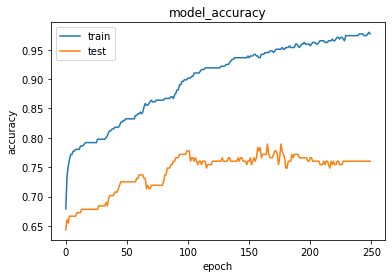

In [72]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [73]:
forest.columns

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed',
       'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep',
       'size_category'],
      dtype='object')

# Droping day dummy Column's

In [74]:
x=forest.drop(['dayfri','daymon','daysat','daysun','daythu','daywed','size_category'],axis=1)

In [75]:
y=y=forest.iloc[:,-1]

In [76]:
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,daytue,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,1,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,0,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


# Bulid a model with new data

In [77]:
ss=preprocessing.StandardScaler()
x=ss.fit_transform(x)
y=y.astype('float')
model2=Sequential()
model2.add(Dense(21,activation='relu'))
model2.add(Dense(15,activation='relu'))
model2.add(Dense(1,activation='sigmoid'))


In [78]:
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [79]:
history=model2.fit(x,y,validation_split=0.33,epochs=250,batch_size=50)

Epoch 1/250
7/7 [==============================] - 5s 222ms/step - loss: 1.1817 - accuracy: 0.2428 - val_loss: 1.0591 - val_accuracy: 0.3216
Epoch 2/250
7/7 [==============================] - 2s 346ms/step - loss: 1.0649 - accuracy: 0.2428 - val_loss: 0.9585 - val_accuracy: 0.3216
Epoch 3/250
7/7 [==============================] - 1s 104ms/step - loss: 0.9550 - accuracy: 0.2514 - val_loss: 0.8782 - val_accuracy: 0.3392
Epoch 4/250
7/7 [==============================] - 0s 29ms/step - loss: 0.8736 - accuracy: 0.2861 - val_loss: 0.8145 - val_accuracy: 0.3567
Epoch 5/250
7/7 [==============================] - 0s 31ms/step - loss: 0.8081 - accuracy: 0.3642 - val_loss: 0.7663 - val_accuracy: 0.3743
Epoch 6/250
7/7 [==============================] - 0s 28ms/step - loss: 0.7545 - accuracy: 0.4249 - val_loss: 0.7317 - val_accuracy: 0.3684
Epoch 7/250
7/7 [==============================] - 0s 25ms/step - loss: 0.7155 - accuracy: 0.5462 - val_loss: 0.7062 - val_accuracy: 0.4386
Epoch 8/250
7/7 [

7/7 [==============================] - 1s 90ms/step - loss: 0.3789 - accuracy: 0.8266 - val_loss: 0.5930 - val_accuracy: 0.7427
Epoch 60/250
7/7 [==============================] - 0s 25ms/step - loss: 0.3737 - accuracy: 0.8295 - val_loss: 0.5920 - val_accuracy: 0.7368
Epoch 61/250
7/7 [==============================] - 0s 56ms/step - loss: 0.3692 - accuracy: 0.8295 - val_loss: 0.5909 - val_accuracy: 0.7427
Epoch 62/250
7/7 [==============================] - 0s 25ms/step - loss: 0.3646 - accuracy: 0.8353 - val_loss: 0.5921 - val_accuracy: 0.7485
Epoch 63/250
7/7 [==============================] - 0s 37ms/step - loss: 0.3602 - accuracy: 0.8353 - val_loss: 0.5885 - val_accuracy: 0.7427
Epoch 64/250
7/7 [==============================] - 0s 27ms/step - loss: 0.3556 - accuracy: 0.8382 - val_loss: 0.5859 - val_accuracy: 0.7427
Epoch 65/250
7/7 [==============================] - 0s 17ms/step - loss: 0.3509 - accuracy: 0.8324 - val_loss: 0.5869 - val_accuracy: 0.7427
Epoch 66/250
7/7 [========

7/7 [==============================] - 0s 20ms/step - loss: 0.1542 - accuracy: 0.9538 - val_loss: 0.5976 - val_accuracy: 0.7895
Epoch 118/250
7/7 [==============================] - 0s 31ms/step - loss: 0.1516 - accuracy: 0.9538 - val_loss: 0.5972 - val_accuracy: 0.7953
Epoch 119/250
7/7 [==============================] - 0s 31ms/step - loss: 0.1487 - accuracy: 0.9538 - val_loss: 0.5974 - val_accuracy: 0.7953
Epoch 120/250
7/7 [==============================] - 0s 25ms/step - loss: 0.1465 - accuracy: 0.9566 - val_loss: 0.5984 - val_accuracy: 0.7953
Epoch 121/250
7/7 [==============================] - 0s 24ms/step - loss: 0.1440 - accuracy: 0.9566 - val_loss: 0.5963 - val_accuracy: 0.7953
Epoch 122/250
7/7 [==============================] - 0s 22ms/step - loss: 0.1416 - accuracy: 0.9566 - val_loss: 0.5973 - val_accuracy: 0.8012
Epoch 123/250
7/7 [==============================] - 0s 19ms/step - loss: 0.1395 - accuracy: 0.9538 - val_loss: 0.6025 - val_accuracy: 0.8070
Epoch 124/250
7/7 [=

Epoch 175/250
7/7 [==============================] - 0s 19ms/step - loss: 0.0676 - accuracy: 0.9855 - val_loss: 0.6513 - val_accuracy: 0.8480
Epoch 176/250
7/7 [==============================] - 0s 25ms/step - loss: 0.0673 - accuracy: 0.9855 - val_loss: 0.6586 - val_accuracy: 0.8480
Epoch 177/250
7/7 [==============================] - 0s 19ms/step - loss: 0.0657 - accuracy: 0.9855 - val_loss: 0.6569 - val_accuracy: 0.8480
Epoch 178/250
7/7 [==============================] - 0s 26ms/step - loss: 0.0650 - accuracy: 0.9855 - val_loss: 0.6502 - val_accuracy: 0.8538
Epoch 179/250
7/7 [==============================] - 0s 20ms/step - loss: 0.0642 - accuracy: 0.9855 - val_loss: 0.6537 - val_accuracy: 0.8480
Epoch 180/250
7/7 [==============================] - 0s 25ms/step - loss: 0.0638 - accuracy: 0.9855 - val_loss: 0.6566 - val_accuracy: 0.8480
Epoch 181/250
7/7 [==============================] - 0s 23ms/step - loss: 0.0632 - accuracy: 0.9855 - val_loss: 0.6587 - val_accuracy: 0.8480
Epoch 

Epoch 233/250
7/7 [==============================] - 0s 21ms/step - loss: 0.0355 - accuracy: 0.9942 - val_loss: 0.7256 - val_accuracy: 0.8538
Epoch 234/250
7/7 [==============================] - 0s 19ms/step - loss: 0.0350 - accuracy: 0.9942 - val_loss: 0.7265 - val_accuracy: 0.8596
Epoch 235/250
7/7 [==============================] - 0s 18ms/step - loss: 0.0352 - accuracy: 0.9942 - val_loss: 0.7281 - val_accuracy: 0.8480
Epoch 236/250
7/7 [==============================] - 0s 26ms/step - loss: 0.0354 - accuracy: 0.9942 - val_loss: 0.7302 - val_accuracy: 0.8538
Epoch 237/250
7/7 [==============================] - 0s 26ms/step - loss: 0.0343 - accuracy: 0.9971 - val_loss: 0.7281 - val_accuracy: 0.8480
Epoch 238/250
7/7 [==============================] - 0s 20ms/step - loss: 0.0334 - accuracy: 0.9942 - val_loss: 0.7346 - val_accuracy: 0.8480
Epoch 239/250
7/7 [==============================] - 0s 19ms/step - loss: 0.0332 - accuracy: 0.9942 - val_loss: 0.7365 - val_accuracy: 0.8538
Epoch 

the model2 accuracy is better

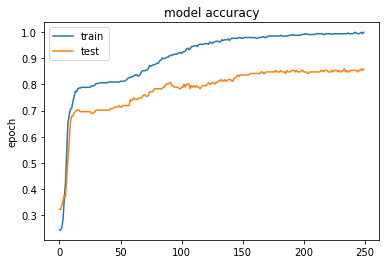

In [80]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

The model2 accuracy is better